In [1]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, cm as cm
from sklearn import linear_model

# =============================================================================
# Après le mentorat de Thierry :
# Voir si les fonctions que j'ai prises sur kaggle ne sont pas de trop.
# Ne pas prendre en compte dans un premier temps les mots-clefs car trop nombreux.
# =============================================================================
    
# Lieu où se trouve le fichier
_FICHIER = 'C:\\Users\\Toni\\Desktop\\movie_metadata.csv'
_DOSSIERTRAVAIL = 'C:\\Users\\Toni\\python\\python\\Projet_3\\images'

In [50]:
# On charge le dataset
data = pd.read_csv(_FICHIER)

In [46]:
#data = data.dropna(axis=1, how='any')
data = data.fillna(0)
print(data)

                 color       director_name  num_critic_for_reviews  duration  \
0                Color       James Cameron                   723.0     178.0   
1                Color      Gore Verbinski                   302.0     169.0   
2                Color          Sam Mendes                   602.0     148.0   
3                Color   Christopher Nolan                   813.0     164.0   
4                    0         Doug Walker                     0.0       0.0   
5                Color      Andrew Stanton                   462.0     132.0   
6                Color           Sam Raimi                   392.0     156.0   
7                Color        Nathan Greno                   324.0     100.0   
8                Color         Joss Whedon                   635.0     141.0   
9                Color         David Yates                   375.0     153.0   
10               Color         Zack Snyder                   673.0     183.0   
11               Color        Bryan Sing

In [24]:
# The movie "gross" has strong positive correlation with the "num_voted_users"
# selection de la première colonne de notre dataset (la taille de la population)
X = data['gross']
# selection de deuxième colonnes de notre dataset (le profit effectué)
Y = data['num_voted_users']

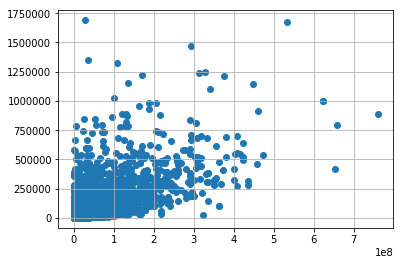

In [25]:
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.show()

In [37]:
# Régression linéaire
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X.values.reshape(-1, 1), Y.values.reshape(-1, 1))      # On fit le résultat obtenu
p=regr.predict(X.values.reshape(-1, 1))                           # Prédictions sur le jeu de "test"

print('Variance : %.2f' % regr.score(X.values.reshape(-1, 1), Y))

print(p)

Variance : 0.39
[[ 1062340.14370732]
 [  452806.20690662]
 [  305078.25103818]
 ..., 
 [   35309.60407066]
 [   37493.37854595]
 [   34850.81631586]]


In [38]:
data['gross']=p

In [51]:
# Transposition du dataframe de données pour l'abalyse univariée
fichier_save = _DOSSIERTRAVAIL + '\\' + 'transposition.csv'
data_transpose = data.describe().reset_index().transpose()
print (data_transpose)
    
missing_data = data.isnull().sum(axis=0).reset_index()

# Change les noms des colonnes
missing_data.columns = ['column_name', 'missing_count']

# Crée une nouvelle colonne et fais le calcul en pourcentage des données
# manquantes
missing_data['filling_factor'] = (data.shape[0]-missing_data['missing_count'])/data.shape[0]*100

# Classe et affiche
missing_data.sort_values('filling_factor').reset_index(drop=True)

                               0            1            2     3            4  \
index                      count         mean          std   min          25%   
num_critic_for_reviews      4993      140.194      121.602     1           50   
duration                    5028      107.201      25.1974     7           93   
director_facebook_likes     4939      686.509      2813.33     0            7   
actor_3_facebook_likes      5020       645.01      1665.04     0          133   
actor_1_facebook_likes      5036      6560.05      15020.8     0          614   
gross                       4159  4.84684e+07   6.8453e+07   162  5.34099e+06   
num_voted_users             5043      83668.2       138485     5       8593.5   
cast_total_facebook_likes   5043      9699.06      18163.8     0         1411   
facenumber_in_poster        5030      1.37117      2.01358     0            0   
num_user_for_reviews        5022      272.771      377.983     1           65   
budget                      

,column_name,missing_count,filling_factor
0,gross,884,82.470752
1,budget,492,90.243902
2,aspect_ratio,329,93.476105
3,content_rating,303,93.991672
4,plot_keywords,153,96.966092
5,title_year,108,97.858418
6,director_name,104,97.937735
7,director_facebook_likes,104,97.937735
8,num_critic_for_reviews,50,99.008527
9,actor_3_facebook_likes,23,99.543922


In [57]:
for name in data:
    print(data[name].value_counts())

Color               4815
 Black and White     209
Name: color, dtype: int64
Steven Spielberg         26
Woody Allen              22
Clint Eastwood           20
Martin Scorsese          20
Ridley Scott             17
Steven Soderbergh        16
Tim Burton               16
Spike Lee                16
Renny Harlin             15
Oliver Stone             14
John Carpenter           13
Joel Schumacher          13
Sam Raimi                13
Ron Howard               13
Barry Levinson           13
Michael Bay              13
Robert Zemeckis          13
Robert Rodriguez         13
Wes Craven               12
Tony Scott               12
Shawn Levy               12
Brian De Palma           12
Kevin Smith              12
Peter Jackson            12
Richard Donner           12
Francis Ford Coppola     11
Stephen Frears           11
Chris Columbus           11
Rob Cohen                11
Richard Linklater        11
                         ..
Eric Blakeney             1
Antonio Banderas          1


ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', 'occurred at index color')